In [2]:
import pandas as pd

results = pd.read_csv(f"results/eval_mmlu-7b-sub_200k-ut.csv")
model_map = {
    "Llama2-7b-all_200k_c-ut-new-hqg9f60c": r"$\mathrm{UT}$",
    "Llama-2-7b-sub_all_200k-it-xcmpque2": r"$\mathrm{IT}$",
}
results["train_mode"] = results.query_model.apply(lambda m: model_map[m])
results = results[results.split == "test"]
# results

In [3]:
dname_map = {d: idx + 1 for idx, d in enumerate(results.dataset.unique())}

plt_results = results[results.split == "test"]
plt_results["task_idx"] = results.dataset.apply(lambda d: dname_map[d])
plt_results["qa_unc_ece_100"] = results["qa_unc_ece"] * 100.
plt_results["unc_acc_100"] = results["unc_acc"] * 100.
plt_results

,N,acc,ece,unc_acc,unc_ece,qa_unc_ece,split,seed,model_name,eval_kshot,prompt_style,mode,dataset,ts,model,query_model,train_mode,task_idx,qa_unc_ece_100,unc_acc_100
1,100,0.270000,0.193926,0.720000,0.046525,0.069487,test,137,llama2_7b,5,choice,eos,mmlu:abstract_algebra,53.292112,Llama-2-7b-sub_all_200k-it-xcmpque2,Llama2-7b-all_200k_c-ut-new-hqg9f60c,$\mathrm{UT}$,1,6.948723,71.999997
3,135,0.481481,0.230408,0.614815,0.085994,0.121433,test,137,llama2_7b,5,choice,eos,mmlu:anatomy,70.289051,Llama-2-7b-sub_all_200k-it-xcmpque2,Llama2-7b-all_200k_c-ut-new-hqg9f60c,$\mathrm{UT}$,2,12.143321,61.481482
5,152,0.506579,0.235746,0.585526,0.108599,0.110684,test,137,llama2_7b,5,choice,eos,mmlu:astronomy,95.725952,Llama-2-7b-sub_all_200k-it-xcmpque2,Llama2-7b-all_200k_c-ut-new-hqg9f60c,$\mathrm{UT}$,3,11.068413,58.552635
7,100,0.510000,0.211835,0.760000,0.111766,0.124006,test,137,llama2_7b,5,choice,eos,mmlu:business_ethics,63.044855,Llama-2-7b-sub_all_200k-it-xcmpque2,Llama2-7b-all_200k_c-ut-new-hqg9f60c,$\mathrm{UT}$,4,12.400556,75.999999
9,265,0.554717,0.199579,0.664151,0.052338,0.085621,test,137,llama2_7b,5,choice,eos,mmlu:clinical_knowledge,141.483452,Llama-2-7b-sub_all_200k-it-xcmpque2,Llama2-7b-all_200k_c-ut-new-hqg9f60c,$\mathrm{UT}$,5,8.562058,66.415095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,245,0.465306,0.364249,0.551020,0.078671,0.100017,test,137,llama2_7b,5,choice,eos,mmlu:security_studies,240.050390,Llama-2-7b-sub_all_200k-it-xcmpque2,Llama-2-7b-sub_all_200k-it-xcmpque2,$\mathrm{IT}$,53,10.001725,55.102038
221,201,0.621891,0.215567,0.567164,0.084892,0.149349,test,137,llama2_7b,5,choice,eos,mmlu:sociology,113.142531,Llama-2-7b-sub_all_200k-it-xcmpque2,Llama-2-7b-sub_all_200k-it-xcmpque2,$\mathrm{IT}$,54,14.934922,56.716418
223,100,0.600000,0.259196,0.470000,0.164911,0.202367,test,137,llama2_7b,5,choice,eos,mmlu:us_foreign_policy,55.243237,Llama-2-7b-sub_all_200k-it-xcmpque2,Llama-2-7b-sub_all_200k-it-xcmpque2,$\mathrm{IT}$,55,20.236737,47.000000
225,166,0.409639,0.347835,0.451807,0.152989,0.152989,test,137,llama2_7b,5,choice,eos,mmlu:virology,85.315140,Llama-2-7b-sub_all_200k-it-xcmpque2,Llama-2-7b-sub_all_200k-it-xcmpque2,$\mathrm{IT}$,56,15.298887,45.180720


## Relative Improvement

/tmp/ipykernel_705329/771667969.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_xticklabels(labels)
/tmp/ipykernel_705329/771667969.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.ax.set_yticklabels(labels)


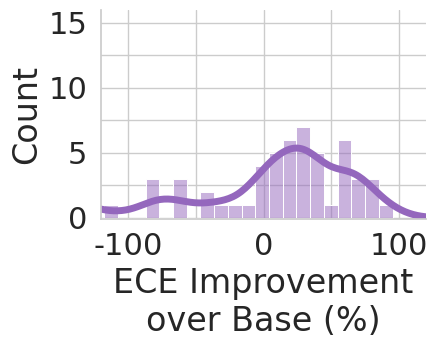

In [12]:
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter

sns.set_theme(font_scale=2., style="whitegrid")

ref = plt_results[plt_results.train_mode == "$\mathrm{IT}$"]["qa_unc_ece_100"].values
new = plt_results[plt_results.train_mode == "$\mathrm{UT}$"]["qa_unc_ece_100"].values



g = sns.displot(
    pd.DataFrame({ "rel_imp": -((new - ref) / ref) * 100. }),
    # kind="kde", fill=True, bw_adjust=.5,
    kde=True, stat="count", kde_kws={"bw_adjust": .5, "cut": 2}, binwidth=10,
    height=4, aspect=11/9, 
    legend=False,
    palette=sns.color_palette("tab20")[8:9]
)

g.ax.get_lines()[0].set(linewidth=5)

import matplotlib.ticker as ticker
g.ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
g.ax.yaxis.set_major_locator(ticker.MultipleLocator(2.5))

g.ax.set_ylim(-0.1, 16)
g.ax.set_xlim(-120, 120)

labels= [f"{int(x)}" for x in g.ax.get_xticks()]
labels[0] = ""
labels[2] = ""
labels[4] = ""
g.ax.set_xticklabels(labels)

labels= [f"{int(x)}" for x in g.ax.get_yticks()]
labels[0] = ""
labels[2] = ""
labels[4] = ""
labels[6] = ""
g.ax.set_yticklabels(labels)

g.set(xlabel="ECE Improvement\nover Base (%)")

g.fig.tight_layout()
g.fig.show()
g.fig.savefig("mmlu_rel_imp_mcqa.pdf", bbox_inches="tight")

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# sns.set(font_scale=2., style='whitegrid')

# metric = "qa_unc_ece_100"
# flip = -1 if metric in ["ece", "qa_unc_ece", "qa_unc_ece_100"] else 1

# ut_metric = plt_results[plt_results.train_mode == "$\mathrm{UT}$"][[metric]].values.flatten()
# it_metric = plt_results[plt_results.train_mode == "$\mathrm{IT}$"][[metric]].values.flatten()

# print(sum(flip * ut_metric <= flip * it_metric))

# fig, ax = plt.subplots(figsize=(5,5))

# ax.set_yticks(np.arange(0, 15, 5))

# ax.hist((((ut_metric - it_metric) * flip / it_metric)) * 100.)

# fig.show()

## Task Breakdown

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(font_scale=6., style='whitegrid')

fig, ax = plt.subplots(figsize=(200, 40))

sns.barplot(ax=ax, data=plt_results,
            x="task_idx", y="unc_acc_100", hue="train_mode",
            width=0.68,
            palette=sns.color_palette("tab20")[8:10])

ax.set_ylabel('Query Acc. (%)', fontsize=250, labelpad=100)
ax.set_ylim(30, 80)
ax.set_yticks(np.arange(0, 100 + 1e-3, 20))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)

ax.set_xlabel('MMLU Task ID', fontsize=250, labelpad=100)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='best',
          title='', title_fontsize=200,
          prop=dict(size=180), bbox_to_anchor=(.91, .7, .1, .1))

fig.tight_layout()
fig.show()
# fig.savefig("mmlu_correctness_comparison.pdf", bbox_inches="tight")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(font_scale=6., style='whitegrid')

fig, ax = plt.subplots(figsize=(200, 40))

sns.barplot(ax=ax, data=plt_results,
            x="task_idx", y="qa_unc_ece_100", hue="train_mode",
            width=0.68,
            palette=sns.color_palette("tab20")[8:10])

ax.set_ylabel(r'$\mathrm{ECE} (\%)$', fontsize=250, labelpad=100)
ax.set_yticks(np.arange(0, 30 + 1e-3, 10))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)

ax.set_xlabel('MMLU Task ID', fontsize=250, labelpad=100)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left',
          title='', title_fontsize=200,
          prop=dict(size=180))

fig.tight_layout()
fig.show()
fig.savefig("mmlu_ece_comparison.pdf", bbox_inches="tight")